# Manage spatial data using Geopandas and Shapely in Python

In [7]:
#h ttps://cambridgespark.com/content/tutorials/geopandas/index.html

## Getting Started
The following tutorial is written for Python 3.

The easiest way to install GeoPandas is using conda to install from conda-forge. Conda-forge is a community lead collection of packages for the conda package manager. Full documentation and instillation instructions for GeoPandas are available here.

The following command will install GeoPandas and all of its dependencies:
<b>conda install -c conda-forge geopandas</b>
Finally, for this tutorial you will require requests and zipfile to import data and extract data from zipped directories. These can be installed with the following command:
<b>conda install requests, zipfile</b>

### Goals:

- Import, manipulate and output spatial data in Python

- Convert text/CSV files to spatial data

- Plot spatial data using matplotlib


### Importing and preparing the data
We require pandas, io, zipfile and requests to import the data.

In [17]:
# More information:
#    https://data.gov.uk/dataset/ff93ffc1-6656-47d8-9155-85ea0b8f2251/national-public-transport-access-nodes-naptan

In [3]:
import pandas as pd

import io
import zipfile
import requests

We can now import the NapTAN data using the requests library. The NaPTAN dataset is available in CSV, XML or a specific transit feed format (GTFS).

In [4]:
r = requests.get('http://naptan.app.dft.gov.uk/DataRequest/Naptan.ashx?format=csv')

The request returns a compressed ZIP file containing the data. The zipfile package lets us extract the data as an object memory, without having to store it in the filesystem.

There are a number of CSV files in the directory, but we are interested in stops.csv, which contains all of the stop points. Pandas can be used to store the data in the CSV file as a data frame.

In [5]:
zf = zipfile.ZipFile(io.BytesIO(r.content))
df = pd.read_csv(zf.open('Stops.csv'), encoding='windows-1252')
df.shape

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,2,5,6,7,9,11,12,13,15,20,21,22,23,24,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(433694, 43)

In [11]:
# number lines ans number columns
df.shape

(433694, 6)

In [6]:
list(df)

['ATCOCode',
 'NaptanCode',
 'PlateCode',
 'CleardownCode',
 'CommonName',
 'CommonNameLang',
 'ShortCommonName',
 'ShortCommonNameLang',
 'Landmark',
 'LandmarkLang',
 'Street',
 'StreetLang',
 'Crossing',
 'CrossingLang',
 'Indicator',
 'IndicatorLang',
 'Bearing',
 'NptgLocalityCode',
 'LocalityName',
 'ParentLocalityName',
 'GrandParentLocalityName',
 'Town',
 'TownLang',
 'Suburb',
 'SuburbLang',
 'LocalityCentre',
 'GridType',
 'Easting',
 'Northing',
 'Longitude',
 'Latitude',
 'StopType',
 'BusStopType',
 'TimingStatus',
 'DefaultWaitTime',
 'Notes',
 'NotesLang',
 'AdministrativeAreaCode',
 'CreationDateTime',
 'ModificationDateTime',
 'RevisionNumber',
 'Modification',
 'Status']

In [8]:
df.head()

,ATCOCode,NaptanCode,PlateCode,CleardownCode,CommonName,CommonNameLang,ShortCommonName,ShortCommonNameLang,Landmark,LandmarkLang,...,TimingStatus,DefaultWaitTime,Notes,NotesLang,AdministrativeAreaCode,CreationDateTime,ModificationDateTime,RevisionNumber,Modification,Status
0,0100053316,bstjpdm,NaN,NaN,Broad Walk Shops,en,NaN,NaN,NaN,NaN,...,OTH,NaN,NaN,NaN,9,2017-07-25T15:33:15,2017-07-17T14:41:57,24,del,del
1,0100053264,bstmjdp,NaN,NaN,Alberton Road,en,NaN,NaN,NaN,NaN,...,OTH,NaN,NaN,NaN,9,2017-07-25T15:33:15,2017-07-17T14:26:49,9,del,del
2,0100053308,bstgtgj,NaN,NaN,Counterslip,en,NaN,NaN,NaN,NaN,...,OTH,NaN,NaN,NaN,9,2017-07-25T15:33:15,2017-07-17T14:46:28,12,del,del
3,0100053306,bstapjm,NaN,NaN,Risdale Road,en,NaN,NaN,NaN,NaN,...,OTH,NaN,NaN,NaN,9,2017-07-25T15:33:15,2017-07-04T15:11:27,18,del,del
4,010000015,bstpgpa,NaN,NaN,Kings Head Lane,en,NaN,NaN,NaN,NaN,...,OTH,NaN,NaN,NaN,9,2017-07-25T15:33:15,2017-07-17T14:38:04,57,del,del


We are only interested in some of these attributes of each stop, specifically the ATCOCode (a unique code for each stop), the CommonName, the StopType, the Status and the Latitude and Longitude.

In [10]:
# Obtain a subset with a columns that we need
df = df[['ATCOCode', 'CommonName', 'StopType', 'Status', 'Latitude', 'Longitude']]

We can also investigate the values in the columns to find out more about their values. Let's have a look at the values which StopType can take.

In [15]:
# we see the unique values we have in the dataset for the column StopType

In [16]:
df.StopType.unique()

array(['BCT', 'FTD', 'RSE', 'BCS', 'TMU', 'AIR', 'BCE', 'TXR', 'STR',
       'BCQ', 'RLY', 'RPL', 'GAT', 'FBT', 'FER', 'MET', 'PLT'], dtype=object)

In [ ]:
# More information about StopType :  http://naptan.dft.gov.uk/naptan/stopTypes.htm

Because we are only interested in the access areas, and so can select only rows corresponding to these stop types, leaving us with a much simpler dataset to analyse!

In [18]:
# Filter for some types of StopType
df = df[df.StopType.isin({'GAT', 'FER', 'RLY', 'MET','BST', 'LCB', 'BCT'})]
df.shape

(419044, 6)

## Converting the dataframe to a geodataframe
We now have a dataframe of all public transport stops in the UK, including their latitude and longitude. However, this data is stored as text, which makes it difficult to do spatial searches. For instance, it would be very difficult to find all stops in a specific area or within a certain distance of a point using a normal dataframe.

In order to resolve this, we can convert the latitude and longitude values to a point geometry, and store these in a geodataframe.

Shapely is a dependency of GeoPandas which allows us to create and manipulate geometry data types.

In [19]:
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

We can use Shapely to create an ordered list of all the points in the dataframe. 

In [20]:
geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]

Shapely will create points using any Cartesian coordinate system. For geographical points, we can define the coordinate reference system (CRS), which allows us to compare points with different data types 

We can specifiy the CRS when we create the geodataframe. Remember to drop the text columns for latitude and longitude, as they are now contained within the geometry column. ( https://epsg.io/4326 )

In [22]:
df = df.drop(['Longitude', 'Latitude'], axis=1)
crs = {'init': 'epsg:4326'}
stops = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

In [25]:
df.head()

,ATCOCode,CommonName,StopType,Status,geometry
0,0100053316,Broad Walk Shops,BCT,del,POINT (-2.5876178397 51.455838217)
1,0100053264,Alberton Road,BCT,del,POINT (-2.5407019785 51.48899127649999)
2,0100053308,Counterslip,BCT,del,POINT (-2.587673673 51.4557030625)
3,0100053306,Risdale Road,BCT,del,POINT (-2.5878037737 51.45574736819999)
4,010000015,Kings Head Lane,BCT,del,POINT (-2.5878034271 51.455720395)


The geodataframe now has the all of the stops stored as geometric points in the EPSG4326 coordinate reference system. We can investigate this data by plotting it. For instance, the following command creates a plot of all railway stations in the UK.

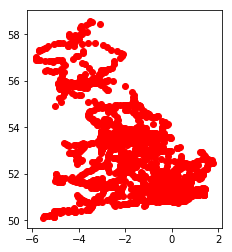

In [26]:
stops[stops.StopType=='RLY'].plot(color='red')

## Spatial searches
The primary reason for converting spatial data from text to geometry is to allow for spatial searching, for instance to return all stops in a certain area or within a certain distance of a point.

We will import a shapefile (SHP) of the country boundaries in England and Wales. Shapefiles are made up of several files, <b>3 of which are mandatory (SHP, SHX, DBF)</b>. All of these files need to be stored in the same directory. As with the previous dataset, the HTTP request returns the data as a ZIP file. However, we now need to extract all of the files to the same directory to ensure we can access all parts of the shapefile.

The following packages allow us to store these files in a temporary directory so they do not clutter our filesystem.

In [27]:
from tempfile import mkdtemp
from os.path import join

tempdir=mkdtemp()

In [28]:
r = requests.get('http://geoportal.statistics.gov.uk/datasets/687f346f5023410ba86615655ff33ca9_3.zip')
zf = zipfile.ZipFile(io.BytesIO(r.content))
zf.extractall(path=tempdir)
counties = gpd.read_file(join(tempdir, 'Counties_and_Unitary_Authorities_December_2016_Super_Generalised_Clipped_Boundaries_in_England_and_Wales.shp'))

In [29]:
tempdir

'C:\\Users\\Lenovo\\AppData\\Local\\Temp\\tmpnzuyke9s'

In [30]:
zf

<zipfile.ZipFile file=<_io.BytesIO object at 0x0000012760D0A0A0> mode='r'>

In [32]:
counties.head()

,objectid,ctyua16cd,ctyua16nm,ctyua16nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E06000001,Hartlepool,None,447157,531476,-1.27023,54.676159,9.411051e+07,60466.169285,(POLYGON ((-1.258561397495176 54.7260554502135...
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.544670,5.414735e+07,38202.123552,POLYGON ((-1.215710912858051 54.58106706723728...
2,3,E06000003,Redcar and Cleveland,None,464359,519597,-1.00611,54.567520,2.447416e+08,85692.520371,(POLYGON ((-1.118812515590787 54.6288614443116...
3,4,E06000004,Stockton-on-Tees,None,444937,518183,-1.30669,54.556911,2.043841e+08,99766.358345,(POLYGON ((-1.298218567737248 54.6355108616733...
4,5,E06000005,Darlington,None,428029,515649,-1.56835,54.535351,1.977901e+08,97801.401117,POLYGON ((-1.641628511480652 54.61936567911429...


As before, we can plot the geometries. As the two systems have a coordinate reference system specified (the boroughs have the CRS specified in the shapefile), we can plot features from both on the same map. This requires us to import matplotlib, which is a dependency of GeoPandas used for its plot method.

The following code plots all of the airport terminals in the UK, superimposed over the counties in England and Wales.

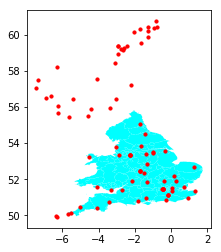

In [42]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.set_aspect('equal')
counties.plot(ax=ax, color='cyan')
stops[stops.StopType=='GAT'].plot(ax=ax, marker='o', color='red', markersize=10)
plt.show();

We can then carry out spatial manipulations on the two geodataframes. The following carries out a spatial join, adding borough information to each stop point in the dataset. As it is an inner join, any stop points points not within a county boundary are removed.

In [37]:
# Managing INTERSECTS in Geo Spacial points betwen STOPS and COUNTIES
stops_with_county = gpd.sjoin(stops, counties, how='inner', op='intersects')

We can then use this table to investigate the numbers of stops in each county. For instance, we can see that the City of London has the least bus stops, with 166, and Hampshire has the most, with 8749.

In [38]:
x = stops_with_county\
        .groupby(['ctyua16nm', 'StopType']) \
        .size() \
        .to_frame('count') \
        .reset_index()
x[x.StopType=='BCT'].sort_values(['count'], ascending='False')

,ctyua16nm,StopType,count
79,City of London,BCT,171
365,Rutland,BCT,243
211,Kensington and Chelsea,BCT,276
168,Hammersmith and Fulham,BCT,332
208,Islington,BCT,426
0,Barking and Dagenham,BCT,445
449,Tower Hamlets,BCT,458
383,Slough,BCT,459
61,Camden,BCT,470
29,Bracknell Forest,BCT,484


Finally, we can produce maps for specific counties. For instance, the following code produces a map of all rail stations in Cambridgeshire.

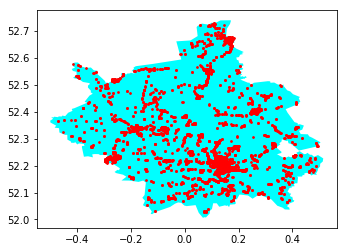

In [43]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
citie = 'Cambridgeshire'

counties.loc[counties.ctyua16nm==citie].plot(ax=ax, color='cyan')
stops_with_county.loc[
    (stops_with_county.StopType=='BCT') \
    & (stops_with_county.ctyua16nm==citie)
].plot(ax=ax, marker='o', color='red', markersize=3)
plt.show();

We could also add rail stations to the plot with a different marker.

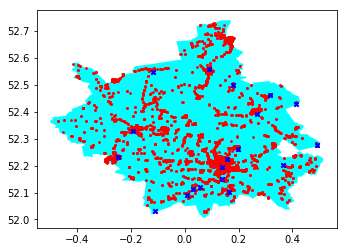

In [49]:
stops_with_county.loc[(stops_with_county.StopType=='RLY') \
                      & (stops_with_county.ctyua16nm==citie)].\
                    plot(ax=ax, marker='x', color='blue', markersize=10)
fig